In [90]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from joblib import dump

In [2]:
#carga de dataset archivo base de datos cliente
dataset_titanic = pd.read_csv("C:/Users/hevas/Downloads/data_titanic_proyecto.csv", sep=',')
dataset_titanic.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,F,Y
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,M,N


In [4]:
dataset_titanic.shape

(891, 12)

In [5]:
dataset_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Name                891 non-null    object 
 2   Age                 714 non-null    float64
 3   SibSp               891 non-null    int64  
 4   Parch               891 non-null    int64  
 5   Ticket              891 non-null    object 
 6   Fare                891 non-null    float64
 7   Cabin               204 non-null    object 
 8   Embarked            889 non-null    object 
 9   passenger_class     891 non-null    object 
 10  passenger_sex       891 non-null    object 
 11  passenger_survived  891 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [6]:
dataset_titanic.isna().sum()

PassengerId             0
Name                    0
Age                   177
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                 687
Embarked                2
passenger_class         0
passenger_sex           0
passenger_survived      0
dtype: int64

In [7]:
dataset_titanic.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
dataset_titanic.describe(include=['O'])

,Name,Ticket,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
count,891,891,204,889,891,891,891
unique,891,681,147,3,3,2,2
top,"Braund, Mr. Owen Harris",347082,B96 B98,S,Lower,M,N
freq,1,7,4,644,491,577,549


In [9]:
dataset_titanic['passenger_survived'].unique()

array(['N', 'Y'], dtype=object)

In [10]:
dataset_titanic['no_passenger_survived'] = dataset_titanic['passenger_survived'].map( {'Y': 1, 'N': 0})

In [11]:
dataset_titanic.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived,no_passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y,1
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,F,Y,1
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,M,N,0


In [12]:
dataset_titanic['no_passenger_survived'].unique()

array([0, 1], dtype=int64)

In [13]:
dataset_titanic.groupby('passenger_survived').size()

passenger_survived
N    549
Y    342
dtype: int64

N: No sobrevive: 549
S: Sobrevive: 342
Proporción: 1.61 : 1


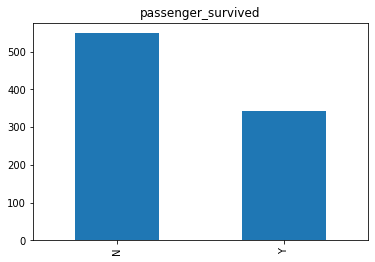

In [14]:
#sns.factorplot('passenger_survived', data=dataset_titanic,kind="count")

# Detección del desbalance de la muestras
target_count = dataset_titanic.passenger_survived.value_counts()
print('N: No sobrevive:', target_count[0])
print('S: Sobrevive:', target_count[1])
print('Proporción:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='passenger_survived');

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


no_passenger_survived               
                              count  sum      mean
passenger_sex                                     
F                               314  233  0.742038
M                               577  109  0.188908

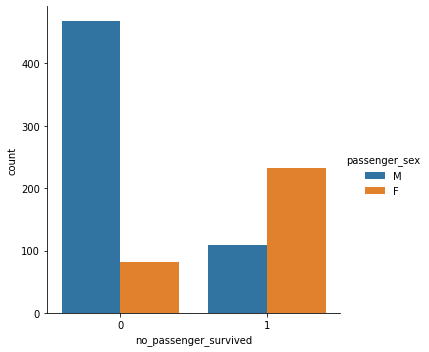

In [15]:
sns.factorplot('no_passenger_survived', data=dataset_titanic, hue='passenger_sex',kind="count")

dataset_titanic[['passenger_sex','no_passenger_survived']].groupby(['passenger_sex'], as_index=False).agg(['count','sum','mean'])

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


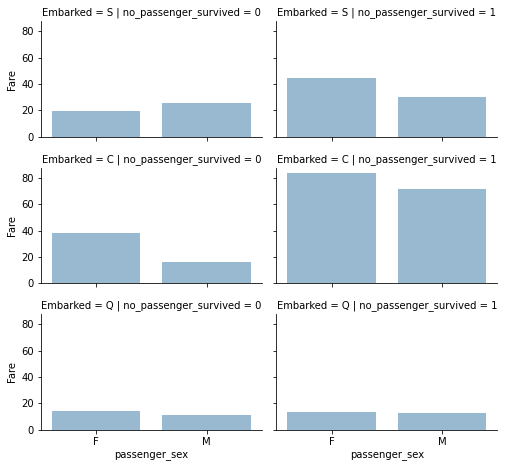

In [16]:
grid = sns.FacetGrid(dataset_titanic, row='Embarked', col='no_passenger_survived', size = 2.2, aspect = 1.6)
grid.map(sns.barplot, 'passenger_sex','Fare', alpha = .5, ci=None)
grid.add_legend()

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

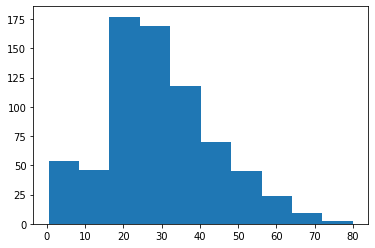

In [17]:
plt.hist(dataset_titanic.Age)

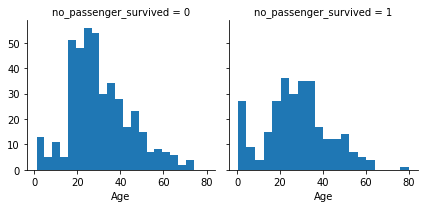

In [18]:
chart_edad_surv = sns.FacetGrid(dataset_titanic, col='no_passenger_survived')
chart_edad_surv.map(plt.hist, 'Age', bins = 20)

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


no_passenger_survived               
                                count  sum      mean
passenger_class                                     
Lower                             491  119  0.242363
Middle                            184   87  0.472826
Upper                             216  136  0.629630

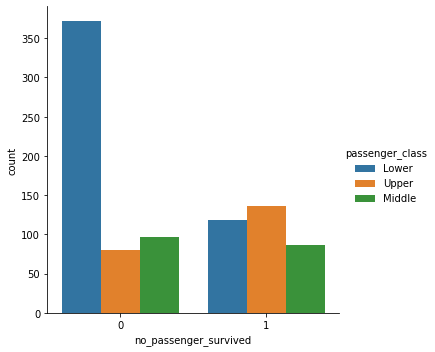

In [19]:
sns.factorplot('no_passenger_survived', data=dataset_titanic, hue='passenger_class',kind="count")

dataset_titanic[['passenger_class','no_passenger_survived']].groupby(['passenger_class'], as_index=False).agg(['count','sum','mean'])

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


no_passenger_survived               
                         count  sum      mean
Embarked                                     
C                          168   93  0.553571
Q                           77   30  0.389610
S                          644  217  0.336957

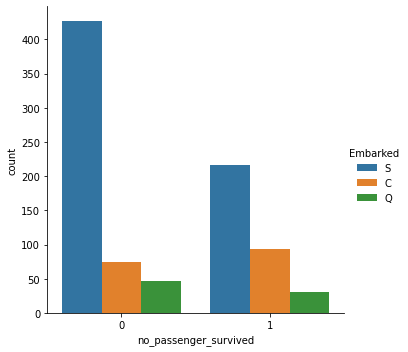

In [20]:
sns.factorplot('no_passenger_survived', data=dataset_titanic, hue='Embarked',kind="count")

dataset_titanic[['Embarked','no_passenger_survived']].groupby(['Embarked'], as_index=False).agg(['count','sum','mean'])

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


no_passenger_survived               
                      count  sum      mean
Parch                                     
0                       678  233  0.343658
1                       118   65  0.550847
2                        80   40  0.500000
3                         5    3  0.600000
4                         4    0  0.000000
5                         5    1  0.200000
6                         1    0  0.000000

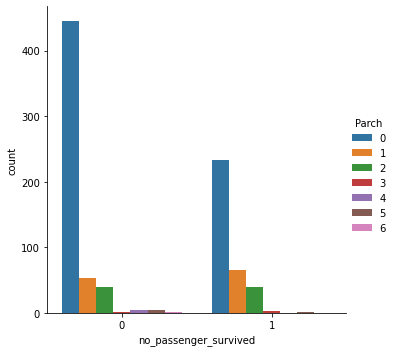

In [21]:
# of siblings / spouses aboard the titanic
# De hermanas / cónyuges a bordo del titanic
sns.factorplot('no_passenger_survived', data=dataset_titanic, hue='Parch',kind="count")

dataset_titanic[['Parch','no_passenger_survived']].groupby(['Parch'], as_index=False).agg(['count','sum','mean'])

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


no_passenger_survived               
                      count  sum      mean
SibSp                                     
0                       608  210  0.345395
1                       209  112  0.535885
2                        28   13  0.464286
3                        16    4  0.250000
4                        18    3  0.166667
5                         5    0  0.000000
8                         7    0  0.000000

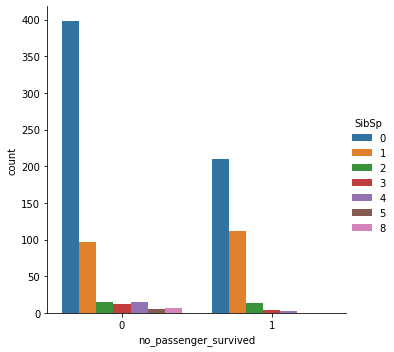

In [22]:
# of parents/ children aboard the titanic
# de padres/ hijos a bordo del titanic
sns.factorplot('no_passenger_survived', data=dataset_titanic, hue='SibSp',kind="count")

dataset_titanic[['SibSp','no_passenger_survived']].groupby(['SibSp'], as_index=False).agg(['count','sum','mean'])

<AxesSubplot:xlabel='passenger_class', ylabel='Fare'>

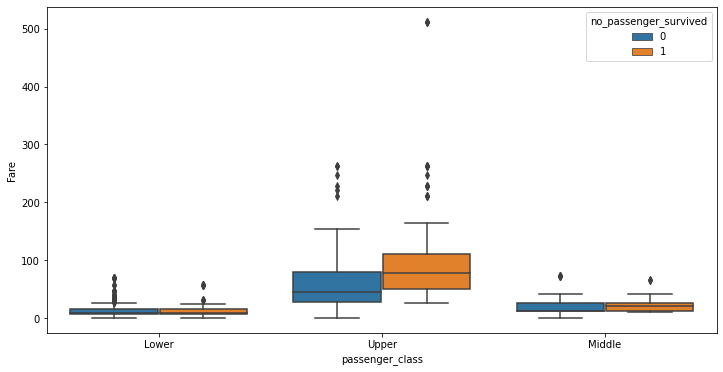

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(x="passenger_class",y="Fare", hue="no_passenger_survived", data=dataset_titanic)

In [24]:
dataset_titanic.drop(['Name','PassengerId','Cabin','Ticket'], axis='columns', inplace=True)

In [25]:
pd.get_dummies(dataset_titanic)

,Age,SibSp,Parch,Fare,no_passenger_survived,Embarked_C,Embarked_Q,Embarked_S,passenger_class_Lower,passenger_class_Middle,passenger_class_Upper,passenger_sex_F,passenger_sex_M,passenger_survived_N,passenger_survived_Y
0,22.0,1,0,7.2500,0,0,0,1,1,0,0,0,1,1,0
1,38.0,1,0,71.2833,1,1,0,0,0,0,1,1,0,0,1
2,26.0,0,0,7.9250,1,0,0,1,1,0,0,1,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,1,1,0,0,1
4,35.0,0,0,8.0500,0,0,0,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,0,0,0,1,0,1,0,0,1,1,0
887,19.0,0,0,30.0000,1,0,0,1,0,0,1,1,0,0,1
888,NaN,1,2,23.4500,0,0,0,1,1,0,0,1,0,1,0
889,26.0,0,0,30.0000,1,1,0,0,0,0,1,0,1,0,1


In [26]:
dataset_titanic.head()

,Age,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,passenger_survived,no_passenger_survived
0,22.0,1,0,7.2500,S,Lower,M,N,0
1,38.0,1,0,71.2833,C,Upper,F,Y,1
2,26.0,0,0,7.9250,S,Lower,F,Y,1
3,35.0,1,0,53.1000,S,Upper,F,Y,1
4,35.0,0,0,8.0500,S,Lower,M,N,0


In [27]:
dataset_titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [28]:
dataset_titanic['Embarked'].isna().sum()

2

In [29]:
# Imputamos la variable Embarked con la moda
dataset_titanic['Embarked'].fillna(dataset_titanic['Embarked'].mode()[0], inplace=True)
print("Valores perdidos en num-of-doors: " + 
      str(dataset_titanic['Embarked'].isnull().sum()))

Valores perdidos en num-of-doors: 0


In [30]:
dataset_titanic['Embarked'].isna().sum()

0

In [31]:
dataset_titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [32]:
dataset_titanic['Embarked'] = dataset_titanic['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2})

In [33]:
dataset_titanic['passenger_class'].unique()

array(['Lower', 'Upper', 'Middle'], dtype=object)

In [34]:
dataset_titanic['passenger_class'] = dataset_titanic['passenger_class'].map( {'Lower': 0, 'Upper': 1, 'Middle': 2})

In [35]:
dataset_titanic['passenger_sex'].unique()

array(['M', 'F'], dtype=object)

In [36]:
dataset_titanic['passenger_sex'] = dataset_titanic['passenger_sex'].map( {'M': 0, 'F': 1})

In [37]:
dataset_titanic['Age'].isna().sum()

177

In [38]:
age_avg = dataset_titanic['Age'].mean()
age_std = dataset_titanic['Age'].std()
age_null_count = dataset_titanic['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

conValoresNulos = np.isnan(dataset_titanic['Age'])

dataset_titanic.loc[np.isnan(dataset_titanic['Age']), 'Age'] = age_null_random_list
dataset_titanic['Age'] = dataset_titanic['Age'].astype(int)
print("Edad Promedio: " + str(age_avg))
print("Desvió Std Edad: " + str(age_std))
print("Intervalo para asignar edad aleatoria: " + str(int(age_avg - age_std)) + " a " + str(int(age_avg + age_std)))

Edad Promedio: 29.69911764705882
Desvió Std Edad: 14.526497332334042
Intervalo para asignar edad aleatoria: 15 a 44


In [39]:
dataset_titanic['Age'].isna().sum()

0

In [40]:
# Mapping edad en la que llegaron al billboard
dataset_titanic.loc[ dataset_titanic['Age'] <= 16, 'edadEncoded']  = 0
dataset_titanic.loc[(dataset_titanic['Age'] > 16) & (dataset_titanic['Age'] <= 32), 'edadEncoded'] = 1
dataset_titanic.loc[(dataset_titanic['Age'] > 32) & (dataset_titanic['Age'] <= 48), 'edadEncoded'] = 2
dataset_titanic.loc[(dataset_titanic['Age'] > 48) & (dataset_titanic['Age'] <= 64), 'edadEncoded'] = 3
dataset_titanic.loc[ dataset_titanic['Age'] > 64, 'edadEncoded'] = 4

In [41]:
dataset_titanic['edadEncoded'] = dataset_titanic['edadEncoded'].astype(int)

In [42]:
dataset_titanic['edadEncoded']

0      1
1      2
2      1
3      2
4      2
      ..
886    1
887    1
888    2
889    1
890    1
Name: edadEncoded, Length: 891, dtype: int32

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


no_passenger_survived               
                            count  sum      mean
edadEncoded                                     
0                             113   60  0.530973
1                             440  156  0.354545
2                             258   95  0.368217
3                              69   30  0.434783
4                              11    1  0.090909

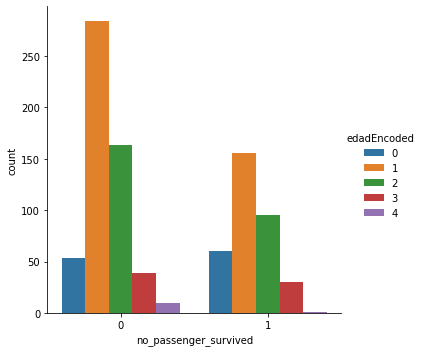

In [43]:
sns.factorplot('no_passenger_survived', data=dataset_titanic, hue='edadEncoded',kind="count")

dataset_titanic[['edadEncoded','no_passenger_survived']].groupby(['edadEncoded'], as_index=False).agg(['count','sum','mean'])

In [44]:
dataset_titanic.head()

,Age,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,passenger_survived,no_passenger_survived,edadEncoded
0,22,1,0,7.2500,0,0,0,N,0,1
1,38,1,0,71.2833,1,1,1,Y,1,2
2,26,0,0,7.9250,0,0,1,Y,1,1
3,35,1,0,53.1000,0,1,1,Y,1,2
4,35,0,0,8.0500,0,0,0,N,0,2


In [45]:
dataset_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    891 non-null    int32  
 1   SibSp                  891 non-null    int64  
 2   Parch                  891 non-null    int64  
 3   Fare                   891 non-null    float64
 4   Embarked               891 non-null    int64  
 5   passenger_class        891 non-null    int64  
 6   passenger_sex          891 non-null    int64  
 7   passenger_survived     891 non-null    object 
 8   no_passenger_survived  891 non-null    int64  
 9   edadEncoded            891 non-null    int32  
dtypes: float64(1), int32(2), int64(6), object(1)
memory usage: 62.8+ KB


In [46]:
correlaciones = dataset_titanic.corr()
correlaciones

,Age,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,no_passenger_survived,edadEncoded
Age,1.000000,-0.229298,-0.171683,0.094594,-0.002977,0.188611,-0.082399,-0.067404,0.939604
SibSp,-0.229298,1.000000,0.414838,0.159651,-0.059961,-0.085918,0.114631,-0.035322,-0.206773
Parch,-0.171683,0.414838,1.000000,0.216225,-0.078665,-0.010198,0.245489,0.081629,-0.151264
Fare,0.094594,0.159651,0.216225,1.000000,0.062142,0.197168,0.182333,0.257307,0.106407
Embarked,-0.002977,-0.059961,-0.078665,0.062142,1.000000,-0.168091,0.116569,0.106811,-0.008796
passenger_class,0.188611,-0.085918,-0.010198,0.197168,-0.168091,1.000000,0.118133,0.247845,0.189577
passenger_sex,-0.082399,0.114631,0.245489,0.182333,0.116569,0.118133,1.000000,0.543351,-0.087353
no_passenger_survived,-0.067404,-0.035322,0.081629,0.257307,0.106811,0.247845,0.543351,1.000000,-0.063730
edadEncoded,0.939604,-0.206773,-0.151264,0.106407,-0.008796,0.189577,-0.087353,-0.063730,1.000000


<AxesSubplot:>

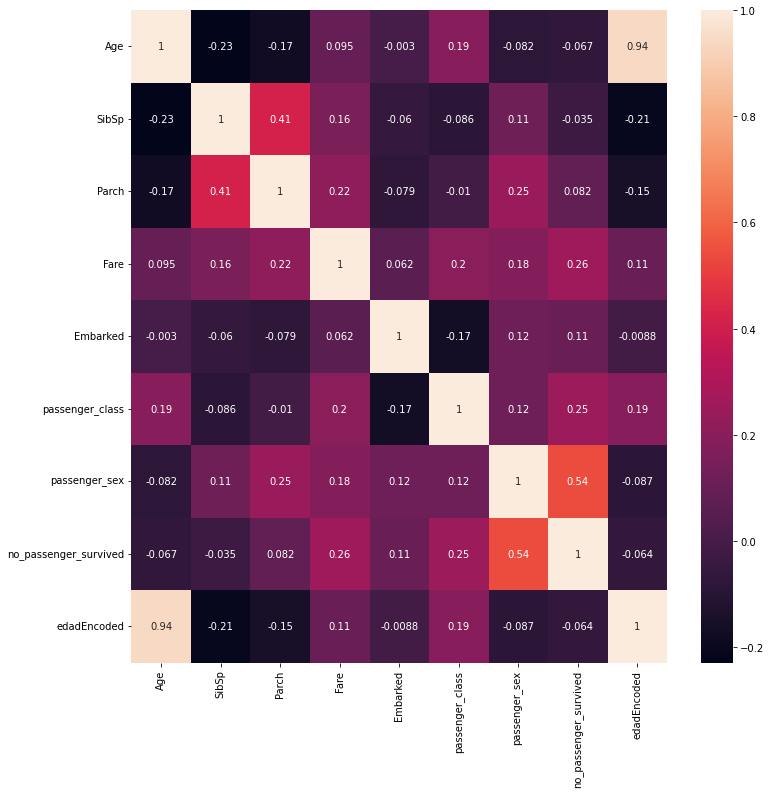

In [47]:
#mapa de correlacion
plt.figure(figsize=(12,12))
sns.heatmap(correlaciones,annot = True)

In [48]:
dataset_titanic.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'passenger_class',
       'passenger_sex', 'passenger_survived', 'no_passenger_survived',
       'edadEncoded'],
      dtype='object')

In [49]:
dataset_titanic.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

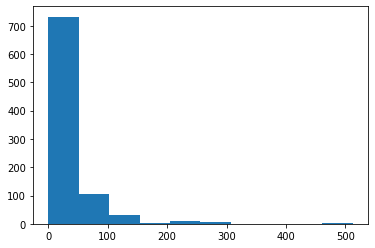

In [50]:
plt.hist(dataset_titanic.Fare)

# Parte 1 Entrenamiento Validación Selección

In [51]:
from sklearn.feature_selection import SelectKBest

In [52]:
X = dataset_titanic[['edadEncoded','SibSp','Parch','Fare','Embarked','passenger_class','passenger_sex','Age']]
y = dataset_titanic['no_passenger_survived']

best=SelectKBest(k=3)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Fare', 'passenger_class', 'passenger_sex'], dtype='object')


In [135]:
# Seleccionaremos un 20% de los datos para estrudiar el beneficio de las estretgias de muestreo
import sklearn.model_selection as model_selection


#X = dataset_titanic[['passenger_class', 'passenger_sex', 'Fare','Embarked']]
X = dataset_titanic[['Fare', 'passenger_class', 'passenger_sex']]
y = dataset_titanic[['no_passenger_survived']]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80,test_size=0.20, random_state=101)

In [136]:
# Solo utilizaremos Datos de entrenamiento para la estrategia 
df_train = pd.concat([X_train,y_train],axis=1)

In [55]:
df_train.head(3)

,Fare,passenger_class,passenger_sex,no_passenger_survived
733,13.00,2,0,0
857,26.55,1,0,1
81,9.50,0,0,1


In [137]:
#División entre máquinas con intensidad de pico
count_class_0, count_class_1 = df_train.no_passenger_survived.value_counts()

# Divide by class
df_class_0 = df_train[df_train['no_passenger_survived'] == 0]
df_class_1 = df_train[df_train['no_passenger_survived'] == 1]

In [138]:
count_class_0, len(df_class_0), count_class_1, len(df_class_1)

(450, 450, 262, 262)

# **UnderSampling**

In [139]:
df_class_0.sample(3)

,Fare,passenger_class,passenger_sex,no_passenger_survived
145,36.75,2,0,0
418,13.00,2,0,0
217,27.00,2,0,0


Estrategia de Muestreo under-sampling:
0    262
1    262
Name: no_passenger_survived, dtype: int64


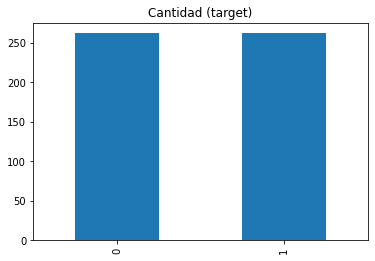

In [140]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Estrategia de Muestreo under-sampling:')
print(df_test_under.no_passenger_survived.value_counts())

df_test_under.no_passenger_survived.value_counts().plot(kind='bar', title='Cantidad (target)');

# OverSampling

In [141]:
aux = df_class_1.head(2)
aux.sample(4,replace=True)

,Fare,passenger_class,passenger_sex,no_passenger_survived
81,9.5,0,0,1
81,9.5,0,0,1
81,9.5,0,0,1
81,9.5,0,0,1


Random over-sampling:
0    450
1    450
Name: no_passenger_survived, dtype: int64


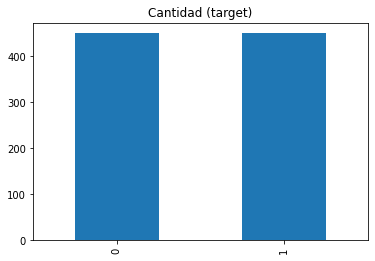

In [142]:
# hay un riesgo de que algunas filas no sean consideradas porque la aletoriedad las ignorara
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.no_passenger_survived.value_counts())

df_test_over.no_passenger_survived.value_counts().plot(kind='bar', title='Cantidad (target)');

In [203]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_tree = accuracy
print("Accuracy DATOS ORIGINALES: %.2f%%" % (accuracy * 100.0))

ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy DATOS ORIGINALES: 80.45%
Log Loss: 6.753432235747183


In [145]:
modelo_arbol = y_pred

Matriz de Confusión - DATOS ORIGINALES:
 [[90  9]
 [26 54]]
Métricas de Matriz de Confusión - DATOS ORIGINALES:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.86      0.68      0.76        80

    accuracy                           0.80       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.80      0.80       179



C:\Users\hevas\AppData\Local\Temp\ipykernel_6728\1813899074.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\hevas\AppData\Local\Temp\ipykernel_6728\1813899074.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


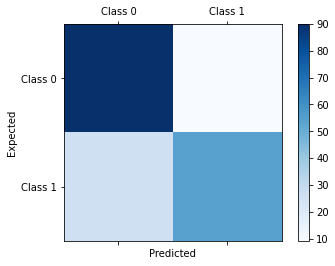

In [63]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión - DATOS ORIGINALES:\n', conf_mat)

print('Métricas de Matriz de Confusión - DATOS ORIGINALES:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# UNDER SAMPLING

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

#X_train_u= df_test_under[['passenger_class', 'passenger_sex', 'Fare','Embarked']]
X_train_u= df_test_under[['Fare', 'passenger_class', 'passenger_sex']]
y_train_u = df_test_under[['no_passenger_survived']]

model.fit(X_train_u, y_train_u)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy UNDERSAMPLING: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy UNDERSAMPLING: 78.21%
Log Loss: 7.5253020723326856


Matriz de Confusión UNDERSAMPLING:
 [[78 21]
 [18 62]]
Métricas de Matriz de Confusión - UNDERSAMPLING:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.75      0.78      0.76        80

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



C:\Users\hevas\AppData\Local\Temp\ipykernel_6728\772091198.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\hevas\AppData\Local\Temp\ipykernel_6728\772091198.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


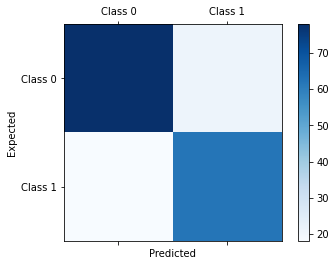

In [65]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión UNDERSAMPLING:\n', conf_mat)

print('Métricas de Matriz de Confusión - UNDERSAMPLING:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# OVER SAMPLING

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

#X_train_o= df_test_over[['passenger_class', 'passenger_sex', 'Fare','Embarked']]
X_train_o = df_test_over[['Fare', 'passenger_class', 'passenger_sex']]
y_train_o = df_test_over[['no_passenger_survived']]

model.fit(X_train_o, y_train_o)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy OVERSAMPLING: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy OVERSAMPLING: 76.54%
Log Loss: 8.104146378450068


Matriz de Confusión OVERSAMPLING:
 [[82 17]
 [25 55]]
Métricas de Matriz de Confusión - OVERSAMPLING:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.76      0.69      0.72        80

    accuracy                           0.77       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.77      0.76       179



C:\Users\hevas\AppData\Local\Temp\ipykernel_6728\1558204625.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\hevas\AppData\Local\Temp\ipykernel_6728\1558204625.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


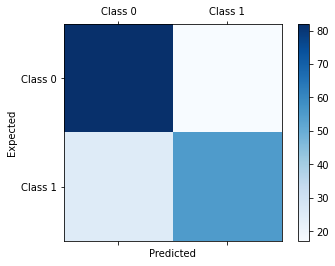

In [67]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión OVERSAMPLING:\n', conf_mat)

print('Métricas de Matriz de Confusión - OVERSAMPLING:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# SVM

In [96]:
from sklearn.metrics import precision_recall_fscore_support

class SVM:
  def __init__(self,feature_names):
        self.modelo = None
        self.feature_names = feature_names
        
  def train(self, data,ylocal,ker='rbf',gam = 'scale',deg = 3):    
        svm_m = svm.SVC(probability = True,kernel= ker, gamma = gam, degree = deg)
        svm_m = svm_m.fit(data[self.feature_names], ylocal.values.ravel())
        self.modelo = svm_m
        return svm_m
        
    
  def predict(self, data):
       return self.modelo.predict(data[self.feature_names])
    

def creasvm(x_train,y_train,gamma,degree,feature_names):
  kernel = 'rbf'
  svm = SVM(feature_names)
  svm.train(x_train,y_train,kernel, gamma, degree)
  return svm


def testsvm(x_test, y_test,gamma,degree,feature_names,modelo):
  fechaHora = datetime.now().strftime("%Y%m%d-%H%M%S")
  kernel = 'rbf'
  tre = modelo.predict(x_test)
  dump(modelo.modelo, '_svm_' + fechaHora + '_kernel=' + kernel + '_gamma=' + gamma + '_degree=' + str(degree) + '.joblib') 
  confusion = confusion_matrix(y_test.to_numpy(), tre ).ravel()

  
  reporte = precision_recall_fscore_support(y_test, tre, average='micro')
  accuracy = metrics.accuracy_score(y_test,tre)
  print(reporte[0],reporte[1],reporte[2],accuracy)
  
  columnas = ",".join(feature_names)

  resultado = np.array([fechaHora,kernel,gamma,
          confusion[0], confusion[1],confusion[2],confusion[3],
          reporte[0],reporte[1],reporte[2],accuracy,columnas
              ])
  salida = pd.DataFrame(resultado).T
  #print(salida.T)
  salida.to_csv("resultadosvm.csv", mode='a', header=False)


#creamos modelo
feature_names = ['Fare','passenger_class','passenger_sex']
model = creasvm(dataset_titanic,
                            pd.DataFrame((dataset_titanic['no_passenger_survived'])),'auto',6,feature_names)

testsvm(dataset_titanic,pd.DataFrame((dataset_titanic['no_passenger_survived'])),'auto',6,feature_names,model)

0.8451178451178452 0.8451178451178452 0.8451178451178452 0.8451178451178452


# Prueba con sklearn svm

In [204]:
from sklearn import svm

clf = svm.SVC(kernel='linear') 


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

modelo_svm = y_pred
accuracy_svm = metrics.accuracy_score(y_test, y_pred)

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7932960893854749
Precision: 0.8307692307692308
Recall: 0.675


# NAIVE BAYES

In [129]:
dataset_titanic.drop(['passenger_survived'], axis='columns', inplace=True)

df = dataset_titanic.to_numpy()
df

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  1.,  2.],
       [26.,  0.,  0., ...,  1.,  1.,  1.],
       ...,
       [39.,  1.,  2., ...,  1.,  0.,  2.],
       [26.,  0.,  0., ...,  0.,  1.,  1.],
       [32.,  0.,  0., ...,  0.,  0.,  1.]])

In [101]:
import numpy as np 

class NaiveBayesClassifier:

    def __init__(self):
        pass

    def separate_classes(self, X, y):
        separated_classes = {}
        for i in range(len(X)):
            feature_values = X[i]
            class_name = y[i]
            if class_name not in separated_classes:
                separated_classes[class_name] = []
            separated_classes[class_name].append(feature_values)
        return separated_classes


    def stat_info(self, X):
        
        for feature in zip(*X):
            yield {
                'std' : np.std(feature),
                'mean' : np.mean(feature)
            }
            
    # Required fit method, to train the model

    def fit (self, X, y):
        
        separated_classes = self.separate_classes(X, y)
        self.class_summary = {}

        for class_name, feature_values in separated_classes.items():
            self.class_summary[class_name] = {
                'prior_proba': len(feature_values)/len(X),
                'summary': [i for i in self.stat_info(feature_values)],
            }
        return self.class_summary

    def distribution(self, x, mean, std):
       
        exponent = np.exp(-((x-mean)**2 / (2*std**2)))

        return exponent / (np.sqrt(2*np.pi)*std)


    def predict(self, X):
        
        MAPs = []

        for row in X:
            joint_proba = {}
            
            for class_name, features in self.class_summary.items():
                total_features =  len(features['summary'])
                likelihood = 1

                for idx in range(total_features):
                    feature = row[idx]
                    mean = features['summary'][idx]['mean']
                    stdev = features['summary'][idx]['std']
                    normal_proba = self.distribution(feature, mean, stdev)
                    likelihood *= normal_proba
                prior_proba = features['prior_proba']
                joint_proba[class_name] = prior_proba * likelihood

            MAP = max(joint_proba, key= joint_proba.get)
            MAPs.append(MAP)

        return MAPs
    
    def accuracy(self, y_test, y_pred):
        true_true = 0

        for y_t, y_p in zip(y_test, y_pred):
            if y_t == y_p:
                true_true += 1 
        return true_true / len(y_test)
    
    

import random

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

for i in range(len(df)):
    for j in range(len(df[i])):
        df[i][j]=float(df[i][j])

def split_data(data, weight):
    train_length = int(len(data) * weight)
    train = []
    for i in range(train_length):
        idx = random.randrange(len(data))
        train.append(data[idx])
        #data.pop(idx)
    return [train, data]

train, test = split_data(df, 0.8)

X_train = []
y_train = []
X_test = []
y_test = []

for i in range(len(train)):
    y_train.append(train[i][0])
    X_train.append(train[i][1:])
    
for i in range(len(test)):
    y_test.append(test[i][0])
    X_test.append(test[i][1:])


model = NaiveBayesClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("accuracy:",(model.accuracy(y_test, y_pred)))

# Prueba con sklearn Naive Bayes

In [205]:
from sklearn.naive_bayes import GaussianNB

classifier= GaussianNB()
classifier.fit(X_train, y_train)
classifier.class_prior_

predicts = classifier.predict(X_test)
accuracy = round(accuracy_score(predicts,y_test),3)
accuracy_naive_bayes = accuracy
modelo_naive_bayes = predicts
print(accuracy)

0.788


C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Regresion logistica

In [150]:
from sklearn.linear_model import LogisticRegression 

In [151]:
lrmodel = LogisticRegression()
lrmodel.fit(X_train,y_train)

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [154]:
prediccion = lrmodel.predict(X_test)
modelo_reglog = prediccion

In [206]:
lrmodel.score(X_train, y_train)
logistic_score = round(lrmodel.score(X_train, y_train)*100,2)
accuracy_reglog = logistic_score
logistic_score

78.09

In [246]:
lrmodel_u = LogisticRegression()
lrmodel_u.fit(X_train_u,y_train_u)

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [250]:
prediccion_u = lrmodel_u.predict(X_test)

In [248]:
lrmodel_u.score(X_train_u, y_train_u)
logistic_score_u = round(lrmodel_u.score(X_train_u, y_train_u)*100,2)
logistic_score_u

75.76

In [252]:
lrmodel_o = LogisticRegression()
lrmodel_o.fit(X_train_o,y_train_o)

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [253]:
prediccion_o = lrmodel_o.predict(X_test)
lrmodel_o.score(X_train_o, y_train_o)
logistic_score_o = round(lrmodel_o.score(X_train_o, y_train_o)*100,2)
logistic_score_o

74.33

# K-fold

In [131]:
# k-fold cross-validation regresion logistica
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)

cv = KFold(n_splits=10, random_state=1, shuffle=True)

model = LogisticRegression()

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.850 (0.128)


# Tabla de Predicciones

In [184]:
modelos = [modelo_reglog,modelo_naive_bayes,modelo_svm,modelo_arbol]

# funcion de prediccion

In [201]:
from scipy import stats

def Ensemble_learning(modelo, data):
    y_pred = []
    for m in modelo:
        y_pred.append(model.predict(X_train)[0])
    cuenta = stats.mode(y_pred)
    y_pred.append(cuenta[1][0])
    y_pred.append(cuenta[0][0])
    return y_pred

def prediccion_modelos(modelos,data,inicio,fin,tamanio):
  dat = []
  valores = np.random.randint(inicio,fin, size=tamanio)
  for i in valores:
      da = Ensemble_learning(modelos,data[i:i+1])
      da.append(data[i:i+1]['no_passenger_survived'].to_numpy()[0])
      dat.append(da)
  dat_resu = pd.DataFrame(dat,columns=['modelo_reglog','modelo_naive_bayes' ,'modelo_svm','modelo_arbol','en','Real'])
  return dat_resu

In [202]:
resultado = prediccion_modelos(modelos,y_train,1,890,100)
resultado

,modelo_reglog,modelo_naive_bayes,modelo_svm,modelo_arbol,en,Real
0,0,0,0,0,4,0
1,0,0,0,0,4,0
2,0,0,0,0,4,0
3,0,0,0,0,4,0
4,0,0,0,0,4,0
...,...,...,...,...,...,...
95,0,0,0,0,4,0
96,0,0,0,0,4,0
97,0,0,0,0,4,0
98,0,0,0,0,4,0


# Metricas

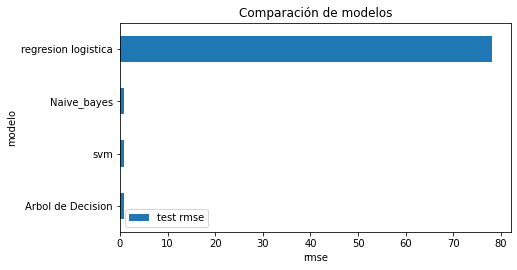

In [208]:
# Validacion de modelos
df_comparacion = pd.DataFrame({
                    'modelo': ['Arbol de Decision', 'svm','Naive_bayes','regresion logistica'],
                    'test rmse': [accuracy_tree,accuracy_svm,accuracy_naive_bayes,accuracy_reglog]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

# Parte 2: Deployment Inferencia Predicción

# ****Conclusiones****
### Realizando pruebas con tecnicas como undersampling, oversampling ya que los datos estaban desbalanceados, estos
### fueron aplicados para todos los modelos
### el mejor modelo fue con la data completa siendo el arbol de decision para este ejercicio

# Arbol de decision

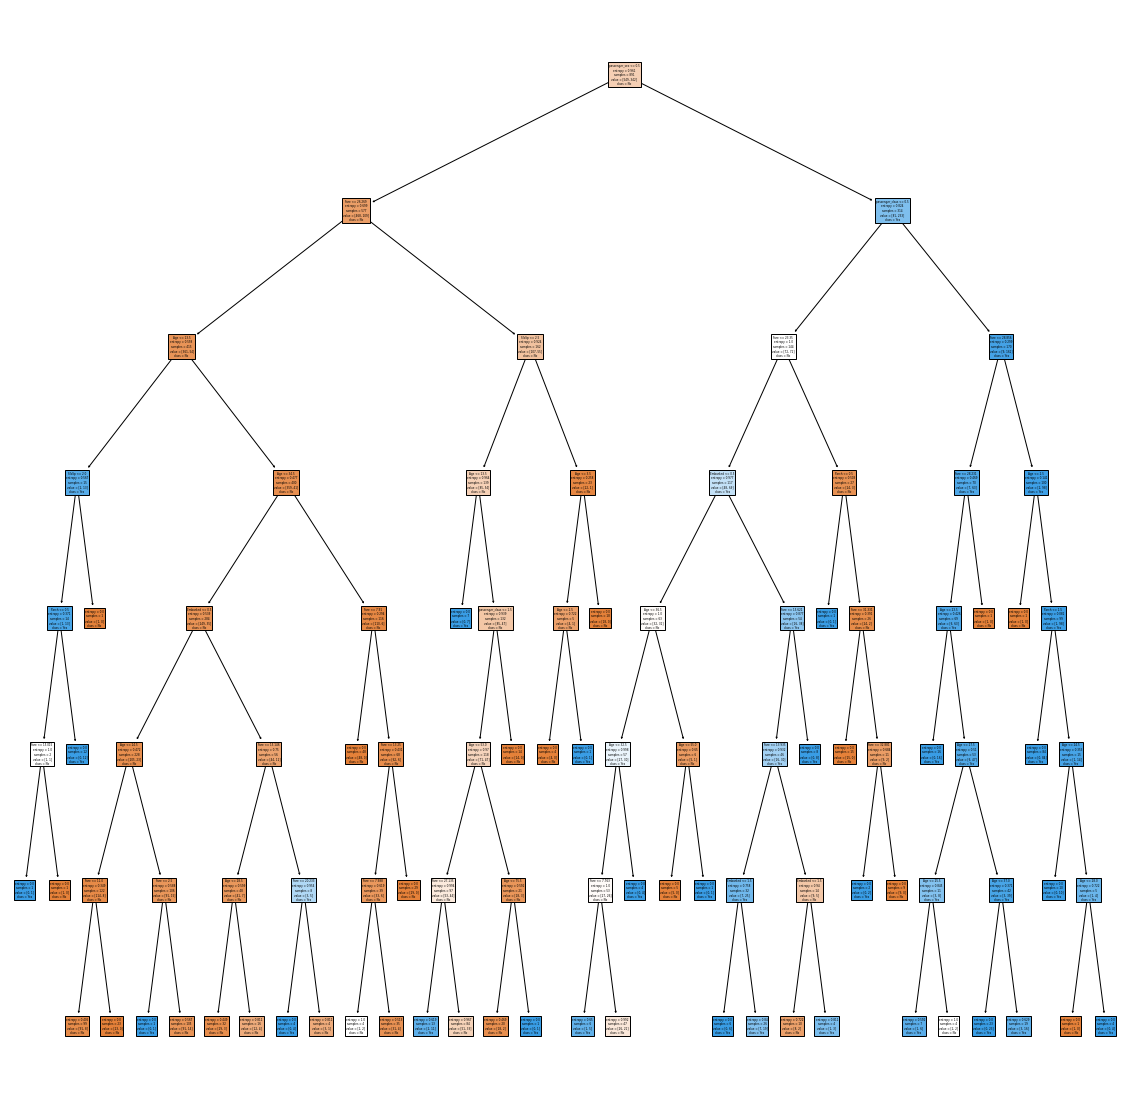

In [214]:
class arbol_predict:
    def __init__(self,feature_names):
        self.modelo = None
        self.feature_names = feature_names
        
    def train(self, data,ylocal, max_depth = 20,splitter = 'best'):    
        tre = tree.DecisionTreeClassifier(max_depth = max_depth,splitter =splitter,criterion='entropy' )
        tre = tre.fit(data[self.feature_names], ylocal)
        self.modelo = tre
        return tre
    
    def predict(self, data):
        return self.modelo.predict(data[self.feature_names])

def creaModelo(x_train,y_train,maxDepth,feature_names):
  splitter = 'best'
  modelo = arbol_predict(feature_names)
  modelo.train(x_train,y_train,maxDepth,splitter)
  return modelo

def ejecutaTest(x_test,y_test,maxDepth,feature_names,modelo):
  fechaHora = datetime.now().strftime("%Y%m%d-%H%M%S")
  splitter = 'best'
  
  tre = modelo.predict(x_test)
  
  dump(modelo.modelo, 'log_tree/model_tree' + fechaHora + '_maxDepth=' + str(maxDepth) + '_splitter=' + splitter + '.joblib') 
  

  confusion = confusion_matrix(y_test.to_numpy(), tre ).ravel()
  reporte = precision_recall_fscore_support(y_test, tre,average='macro')
  accuracy = sk.metrics.accuracy_score(y_test,tre)
  
  print(reporte[0],reporte[1],reporte[2],accuracy)
  columnas = ",".join(feature_names)
  
  resultado = np.array([fechaHora,maxDepth,splitter,
        confusion[0], confusion[1],confusion[2],confusion[3],
        reporte[0],reporte[1],reporte[2],accuracy,columnas
            ])
  resul = pd.DataFrame(resultado).T
  resul.to_csv("salida.csv", mode='a', header=False)


feature_names = ['Age','SibSp','Parch','Fare','Embarked','passenger_class','passenger_sex']
#creaModelo(x_train,y_train,maxDepth,feature_names):
modelo_tree = creaModelo(dataset_titanic,pd.DataFrame((dataset_titanic['no_passenger_survived'])),7,feature_names)  



target_names = ['No','Yes']
fig = plt.figure(figsize=(20,20))
c = tree.plot_tree(modelo_tree.modelo, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)

# Prediccion Naive Vayes

In [268]:
predicts=classifier.predict(X_test)
accuracy=round(accuracy_score(predicts,y_test),3)
print(accuracy)

0.754


# Prediccion Regresion Logistica

In [215]:
class class_predict_lr:
    def __init__(self,feature_names,b, bias):
        self.modelo = None
        self.feature_names = feature_names
        self.b = b
        self.bias = bias
    def predict(self, df):
        local = df[self.feature_names].to_numpy()
        y = np.matmul(local, self.b) + self.bias
        resultado = np.argmax(softmax(y), axis=1)
        return resultado
    

data = pd.read_csv('C:/Users/hevas/Downloads/Log_Reg/rlg_20220706-220334_lr=0.015_reg=0.005_batch=34_ephocs=2001.csv', header=None,names=['id', 'vars','b','bias'])
t1 = data['b'][0].split(',')
t2 = np.array(t1,float)
bias = np.array(data['bias'][0].split(','),float)
lr_modelo = class_predict_lr(data['vars'][0].split(','), t2.reshape(7,2), bias)


In [228]:
modelos = [modelo_tree,lr_modelo]
modelos
def predict_ensable(modelos, data):
    y_pred = []
    for m in modelos:
        y_pred.append(m.predict(data[feature])[0])
    conteo = stats.mode(y_pred)
    y_pred.append(conteo[1][0])
    y_pred.append(conteo[0][0])
    return y_pred

def predecion_model(modelos,data,inicio,fin,tamanio):
  dat = []
  valores = np.random.randint(inicio,fin, size=tamanio)
  for i in valores:
      t = predict_ensable(modelos,data[i:i+1])
      t.append(data[i:i+1]['passenger_survived'].to_numpy()[0])
      dat.append(t)
  dat_resu = pd.DataFrame(dat,columns=['modelo_tree','lr_modelo','RegresionLog','Cantidad','en'])
  return dat_resu

In [247]:
from scipy.special import softmax
df_titanic_validacion = pd.read_csv('C:/Users/hevas/Downloads/titanic_validacion.csv')
feature=['Age','SibSp','Parch','Fare','Embarked','passenger_class','passenger_sex']
resultado = predecion_model(modelos,df_titanic_validacion,1,100,40)
resultado

,modelo_tree,lr_modelo,RegresionLog,Cantidad,en
0,1,0,1,0,0
1,1,0,1,0,0
2,1,0,1,0,0
3,1,1,2,1,0
4,1,0,1,0,0
5,1,0,1,0,0
6,1,0,1,0,0
7,1,1,2,1,1
8,1,0,1,0,0
9,1,0,1,0,0
